In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import random 

%load_ext autoreload

In [2]:
%autoreload 2

from file_reader import read_file


filename = "/Users/ilyalobanov/DS/FFT/junior_quant_task/test.txt" 
ob, prices = read_file(filename)


print(ob[0])
print(prices[0])

[(130535, 20, 'Sell'), (130530, 3, 'Sell'), (130525, 9, 'Sell'), (130520, 35, 'Sell'), (130515, 10, 'Sell'), (130510, 24, 'Sell'), (130505, 24, 'Sell'), (130500, 202, 'Sell'), (130495, 104, 'Sell'), (130490, 16, 'Sell'), (130485, 2, 'Sell'), (130480, 18, 'Sell'), (130475, 28, 'Sell'), (130470, 7, 'Sell'), (130465, 15, 'Sell'), (130460, 6, 'Sell'), (130455, 10, 'Sell'), (130450, 22, 'Sell'), (130445, 2, 'Sell'), (130440, 15, 'Sell'), (130435, 56, 'Buy'), (130430, 11, 'Buy'), (130425, 9, 'Buy'), (130420, 15, 'Buy'), (130415, 44, 'Buy'), (130410, 51, 'Buy'), (130405, 35, 'Buy'), (130400, 53, 'Buy'), (130395, 22, 'Buy'), (130390, 34, 'Buy'), (130385, 44, 'Buy'), (130380, 17, 'Buy'), (130375, 4, 'Buy'), (130370, 8, 'Buy'), (130365, 20, 'Buy'), (130360, 37, 'Buy'), (130355, 2, 'Buy'), (130350, 13, 'Buy'), (130345, 13, 'Buy'), (130340, 15, 'Buy')]
('Sell price', 130490)


In [10]:
import matplotlib.pyplot as plt
import numpy as np
from func import spread

def plot_orderbook(orderbook, sell_price_tuple):
    # Split the orderbook into asks and bids
    asks = [x for x in orderbook if x[2] == 'Sell']
    bids = [x for x in orderbook if x[2] == 'Buy']
    spread_local = spread(orderbook) 
    print(spread_local)
    print(sell_price_tuple[0].split()[0])
    # Compute the volume-weighted price for each level
    ask_prices = [x[0] for x in asks]
    bid_prices = [x[0] for x in bids]

    ask_volumes = [x[1] for x in asks]
    bid_volumes = [x[1] for x in bids]
    ask_vwp = [a*b for a, b in zip(ask_prices, ask_volumes)]
    bid_vwp = [a*b for a, b in zip(bid_prices, bid_volumes)]

    ask_weights = np.array(ask_volumes) / sum(ask_volumes)
    bid_weights = np.array(bid_volumes) / sum(bid_volumes)

    best_ask_price = min(ask_prices)
    best_bid_price = max(bid_prices)

    # Apply weighting based on distance from best price
    # We add a small constant in the denominator to avoid division by zero
    # ask_weights = [1/(abs(best_ask_price - a) + 2) for a in ask_prices]
    # bid_weights = [1/(abs(b - best_bid_price) + 2) for b in bid_prices]
    # plt.bar(ask_prices, ask_vwp_weighted, color='r', alpha=0.5, label='Asks')
    # plt.bar(bid_prices, bid_vwp_weighted, color='g', alpha=0.5, label='Bids')

    ask_vwp_weighted = [a*b for a, b in zip(ask_vwp, ask_weights)]
    bid_vwp_weighted = [a*b for a, b in zip(bid_vwp, bid_weights)]

    plt.figure(figsize=(15, 10))
    print(ask_vwp_weighted[::-1])
    print(bid_vwp_weighted)

    print('Cum')

    ask_cumsum = np.cumsum(ask_vwp_weighted[::-1])
    bid_cumsum = np.cumsum(bid_vwp_weighted)

    print(["{:.0f}".format(num) for num in ask_cumsum])
    print(["{:.0f}".format(num) for num in bid_cumsum])

    print('Volumes')

    print(ask_volumes)
    print(bid_volumes)

    
    plt.plot(ask_prices, ask_vwp_weighted, color='r', alpha=0.5, label='Asks')
    plt.plot(bid_prices, bid_vwp_weighted, color='g', alpha=0.5, label='Bids')

    plt.plot(ask_prices[::-1], ask_cumsum, color='r', alpha=0.5, linestyle=':', label='Asks Cumulative')
    plt.plot(bid_prices, bid_cumsum, color='g', alpha=0.5, linestyle=':', label='Bids Cumulative')
    
    for i, txt in enumerate(ask_vwp_weighted):
        plt.text(ask_prices[i], txt, str(19 - i), fontsize=8)
    for i, txt in enumerate(bid_vwp_weighted):
        plt.text(bid_prices[i], txt, str(i), fontsize=8)
    # Mark the sell price
    if sell_price_tuple[0].split()[1] == 'Sell':
        plt.axvline(x=sell_price_tuple[1], color='r', linestyle='--', label='Sell price')
    else:
        plt.axvline(x=sell_price_tuple[1], color='g', linestyle='--', label='Buy price')

    plt.xlabel('Price')
    plt.ylabel('Volume-Weighted Price')
    plt.legend()
    plt.show()

5
Sell
[51309.44055944056, 912.2027972027972, 110380.76923076923, 22806.818181818184, 8210.76923076923, 51319.27447552448, 11176.625874125873, 178832.86713286713, 73908.25174825176, 912.4825174825174, 58401.118881118884, 2467541.8181818184, 9309304.195804195, 131417.62237762238, 131422.65734265736, 22817.307692307695, 279522.7272727273, 18483.435314685317, 2053.7937062937062, 91283.21678321679]
[813209.0656063618, 31375.805168986088, 21002.83300198807, 58338.9662027833, 501955.14910536783, 674346.7395626243, 317586.72962226643, 728217.8926441352, 125469.54274353878, 299663.6978131213, 501839.68190854875, 74910.17892644135, 4147.117296222664, 16587.83300198807, 103669.9801192843, 354796.8986083499, 1036.6202783300198, 43795.5268389662, 43793.846918489064, 58303.18091451292]
Cum
['51309', '52222', '162602', '185409', '193620', '244939', '256116', '434949', '508857', '509770', '568171', '3035712', '12345017', '12476434', '12607857', '12630674', '12910197', '12928680', '12930734', '1302201

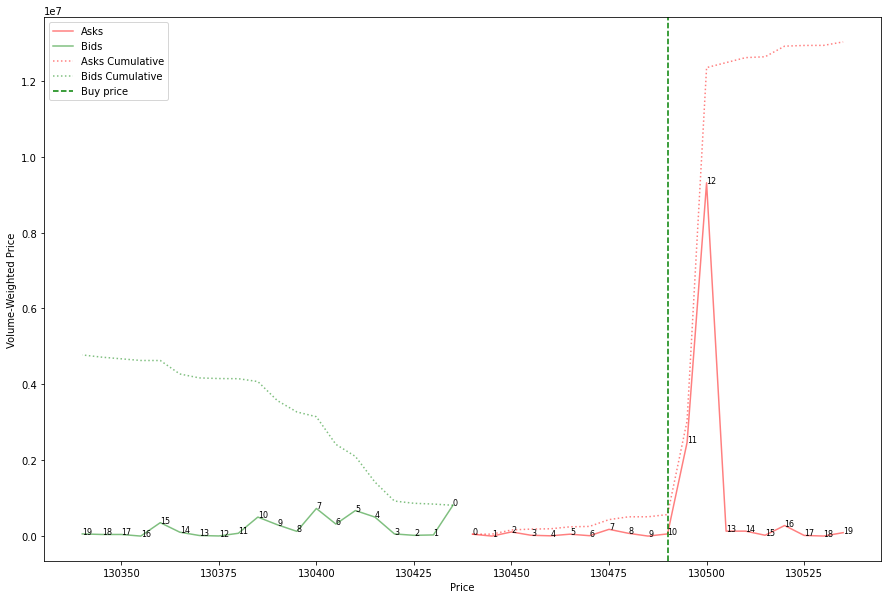

In [11]:
x = 0
plot_orderbook(ob[x], prices[x])

5
Buy
[15713.4, 21388.5, 3928.65, 35359.2, 21390.95, 251462.4, 3929.25, 73785.40000000001, 35365.95, 126187.03333333333, 884216.25, 884250.0, 157642.68333333335, 10917.5, 35374.049999999996, 52844.73333333334, 10918.75, 10919.166666666666, 597956.3833333333, 192628.80000000002]
[388.5459940652819, 1554.1246290801187, 31469.82195845697, 99456.37982195846, 6215.786350148368, 38847.18100890208, 99444.98516320475, 19033.6646884273, 1445337.9821958458, 1553.6498516320476, 76125.93471810089, 171276.8100890208, 112238.33827893175, 19029.302670623143, 55920.71216617211, 65626.66172106825, 125811.9881305638, 373150.3115727003, 1640478.4866468844, 46979.95548961425]
Cum
['15713', '37102', '41031', '76390', '97781', '349243', '353172', '426958', '462324', '588511', '1472727', '2356977', '2514620', '2525537', '2560911', '2613756', '2624675', '2635594', '3233550', '3426179']
['389', '1943', '33412', '132869', '139085', '177932', '277377', '296410', '1741748', '1743302', '1819428', '1990705', '21029

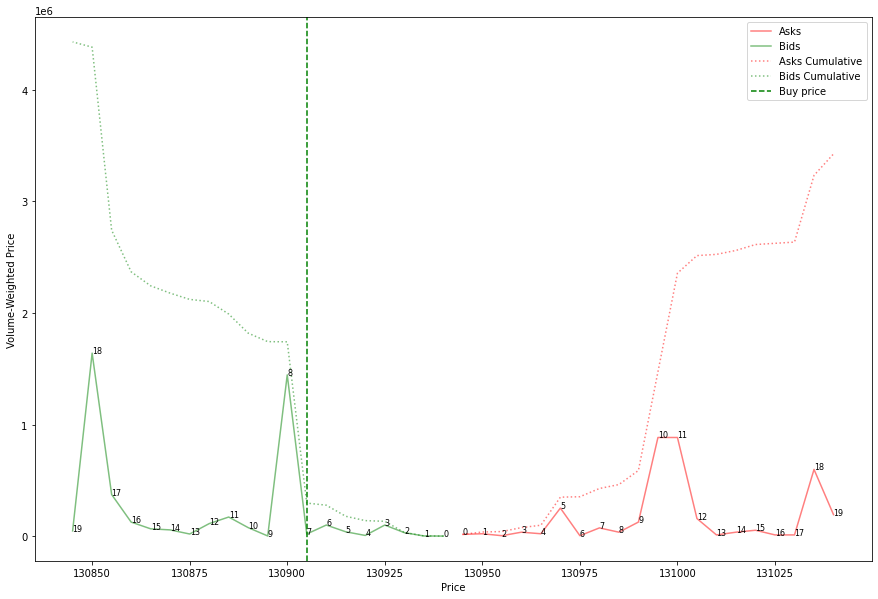

In [12]:
x = 1
plot_orderbook(ob[x], prices[x])

5
Sell
[15038.857142857143, 234.99107142857142, 304559.99999999994, 5875.223214285714, 15041.142857142857, 519174.1696428571, 84847.89285714286, 184275.0, 434614.0535714286, 497392.25, 1086970.2857142857, 519292.50892857136, 240731.42857142855, 940.3928571428571, 23510.714285714283, 564513.6875, 256051.125, 11521.5625, 304745.14285714284, 288060.9375]
[4737.06, 88948.08, 42630.299999999996, 75784.32, 383643.54, 18944.64, 63672.619999999995, 152071.80000000002, 526.1800000000001, 42618.96, 232027.74000000002, 52612.0, 63658.1, 644448.0000000001, 33667.840000000004, 8416.64, 170430.47999999998, 118350.0, 103092.08, 18934.56]
Cum
['15039', '15274', '319834', '325709', '340750', '859924', '944772', '1129047', '1563661', '2061054', '3148024', '3667316', '3908048', '3908988', '3932499', '4497013', '4753064', '4764585', '5069330', '5357391']
['4737', '93685', '136315', '212100', '595743', '614688', '678361', '830432', '830959', '873578', '1105605', '1158217', '1221875', '1866323', '1899991', 

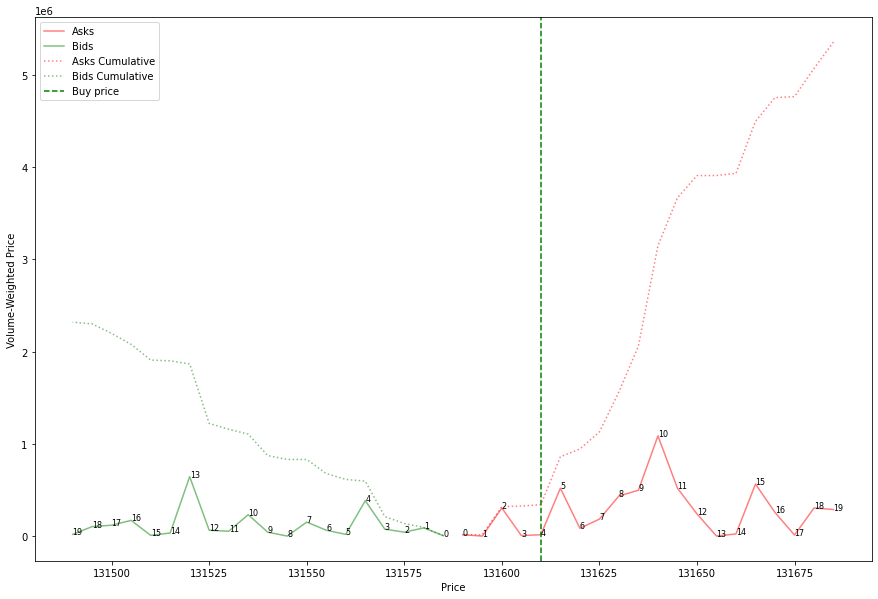

In [13]:
x = 2
plot_orderbook(ob[x], prices[x])

5
Sell
[153.7646370023419, 22142.950819672133, 88575.1756440281, 30141.31147540984, 96117.53512880563, 15379.391100702578, 88588.66510538642, 15380.562060889932, 9843.934426229509, 22149.695550351287, 129365.29859484779, 1999162.2014051524, 12460.626463700233, 112149.90632318502, 400155.0175644028, 311551.22950819676, 88622.3887587822, 20498553.864168618, 74473.09133489462, 120638.68852459016]
[276.4421052631579, 12423467.789473685, 33445.67368421053, 6910.0, 13543.084210526316, 276.37894736842105, 54168.21052631579, 27635.78947368421, 13541.021052631579, 27633.684210526317, 358118.9052631579, 559539.4736842106, 62168.68421052632, 46693.81052631579, 2486.557894736842, 121836.6947368421, 70723.36842105263, 13536.378947368421, 4419.873684210526, 378161.0315789474]
Cum
['154', '22297', '110872', '141013', '237131', '252510', '341099', '356479', '366323', '388473', '517838', '2517000', '2529461', '2641611', '3041766', '3353317', '3441940', '23940494', '24014967', '24135605']
['276', '12423

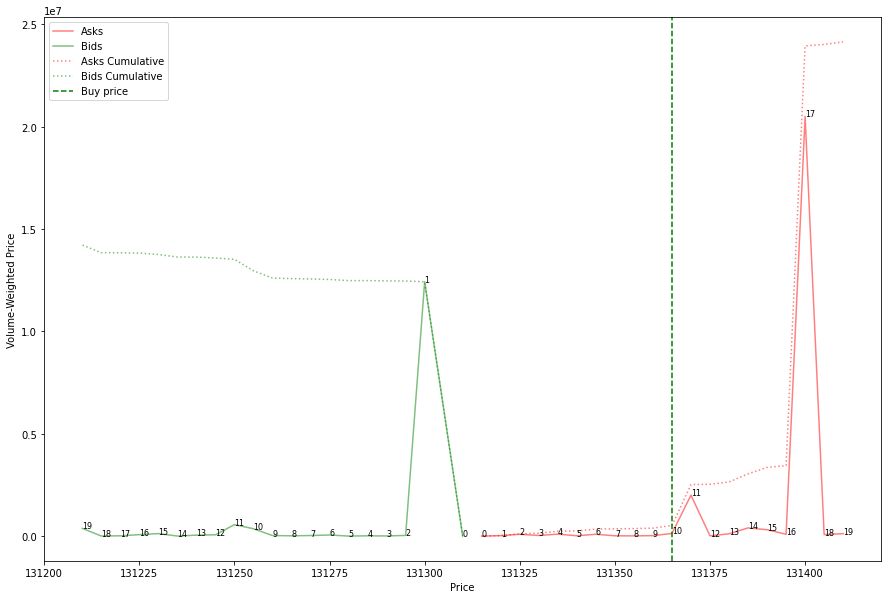

In [14]:
x = 3
plot_orderbook(ob[x], prices[x])

10
Buy
[298780.44444444444, 1167.1555555555556, 2626.2000000000003, 49316.07777777778, 65660.0, 23638.5, 2626.6000000000004, 10506.800000000001, 443929.2, 851115.6, 357563.8888888889, 57212.4, 141284.9777777778, 128737.70000000001, 168153.6, 182465.27777777778, 444064.4, 116786.66666666667, 168179.2, 729972.2222222221]
[42102.48576850095, 2242.0588235294117, 80711.04364326377, 56047.20113851992, 255067.32447817837, 143469.90512333965, 255047.8937381404, 573835.9013282732, 143453.51043643264, 30134.051233396585, 647732.9032258064, 753293.880455408, 209420.17077798862, 20169.307400379508, 3983.908918406072, 271144.4686907021, 80668.00759013282, 109793.93738140418, 725956.7362428842, 271103.1404174573]
Cum
['298780', '299948', '302574', '351890', '417550', '441188', '443815', '454322', '898251', '1749367', '2106930', '2164143', '2305428', '2434166', '2602319', '2784784', '3228849', '3345635', '3513815', '4243787']
['42102', '44345', '125056', '181103', '436170', '579640', '834688', '14085

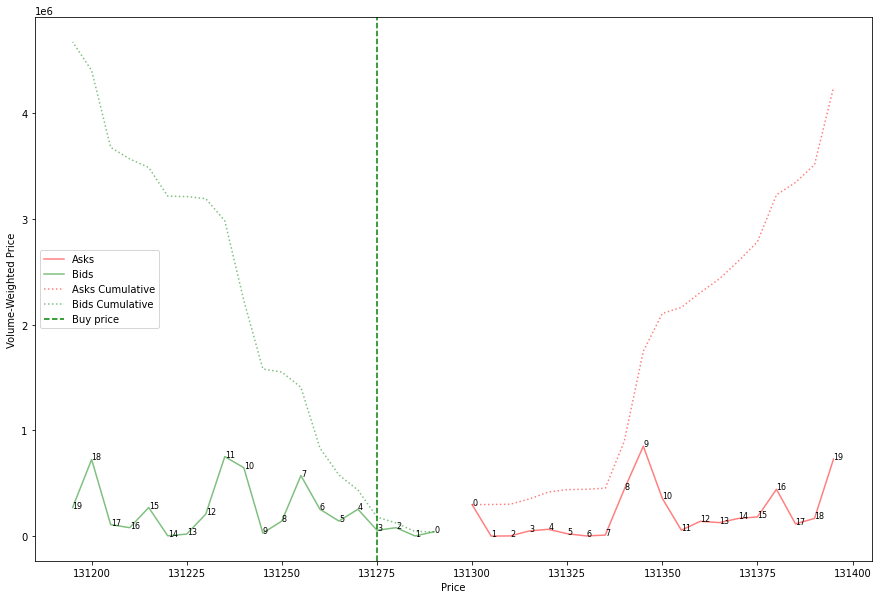

In [15]:
x = 4
plot_orderbook(ob[x], prices[x])

10
Sell
[2899.777777777778, 15788.283950617282, 32222.22222222222, 54457.641975308645, 271009.65432098764, 623893.925925926, 54463.90123456791, 26105.0, 2900.666666666667, 1361754.0123456789, 63174.91358024691, 252709.3333333333, 652750.0, 217914.02469135803, 32237.037037037036, 975207.7160493827, 1289.5802469135801, 5158.518518518518, 5158.716049382716, 142192.55555555556]
[3271.0863509749306, 52335.37604456825, 9085.654596100278, 93033.53760445683, 192237.71587743732, 61411.96378830084, 1453.481894150418, 17804.470752089135, 61404.902506963794, 284849.6935933148, 131156.6295264624, 581281.3370473537, 52313.3147632312, 36327.298050139274, 524546.0724233983, 227028.2033426184, 581169.9164345404, 305465.7242339833, 160172.6740947075, 3268.704735376045]
Cum
['2900', '18688', '50910', '105368', '376378', '1000272', '1054735', '1080840', '1083741', '2445495', '2508670', '2761379', '3414129', '3632043', '3664280', '4639488', '4640778', '4645936', '4651095', '4793287']
['3271', '55606', '646

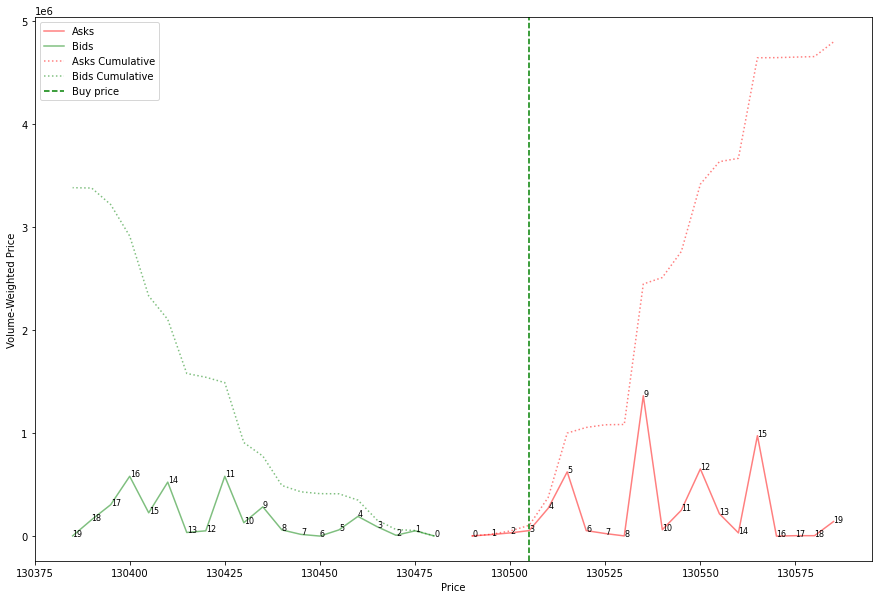

In [16]:
x = 5
plot_orderbook(ob[x], prices[x])

15
Buy
[124263.5294117647, 20626.150326797386, 124273.05882352941, 286572.045751634, 38358.82352941176, 68196.07843137255, 106560.45751633987, 461040.83660130715, 286626.98039215687, 28817.261437908495, 246235.03267973854, 2971304.470588235, 28820.57516339869, 38372.05882352941, 90220.43137254902, 43662.22222222222, 17056.2091503268, 1011301.3921568628, 315393.47712418303, 2708155.058823529]
[2865.604395604396, 716.3736263736264, 45846.15384615385, 86674.56043956045, 877456.7307692309, 6446.373626373626, 11459.780219780221, 6445.879120879121, 71618.13186813187, 45832.08791208792, 103118.24175824175, 17901.785714285714, 258491.86813186813, 378772.7197802198, 25775.604395604398, 161091.34615384616, 6443.406593406594, 35079.42307692308, 6442.912087912088, 11453.626373626375]
Cum
['124264', '144890', '269163', '555735', '594094', '662290', '768850', '1229891', '1516518', '1545335', '1791570', '4762875', '4791695', '4830067', '4920288', '4963950', '4981006', '5992308', '6307701', '9015856']

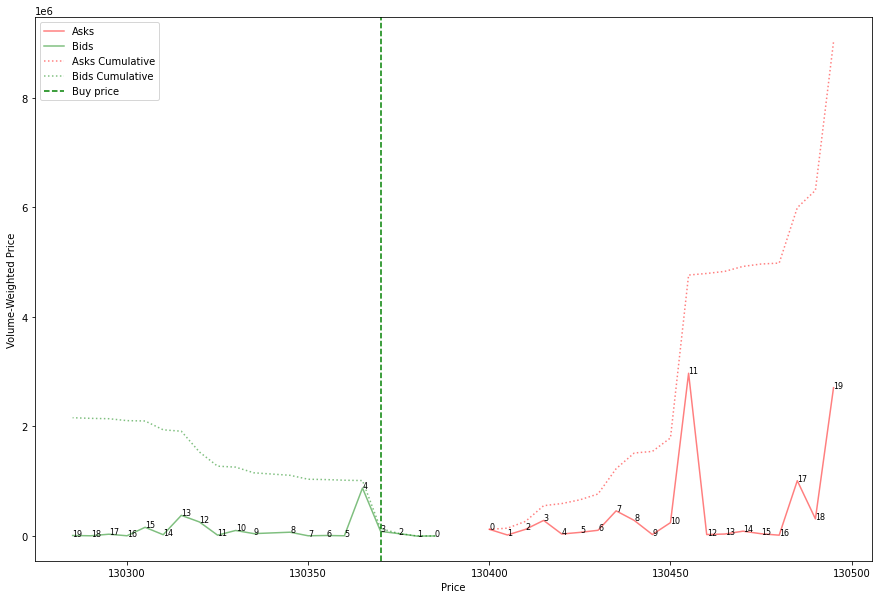

In [17]:
x = 6
plot_orderbook(ob[x], prices[x])

15
Buy
[11143.058823529413, 111744.36470588236, 297480.3764705882, 7739.117647058823, 2786.188235294118, 4953.411764705882, 1238.3999999999999, 1238.4470588235292, 683958.3764705883, 163797.07058823528, 1788521.411764706, 123863.5294117647, 25083.317647058822, 52336.31764705883, 242800.18823529413, 44597.64705882353, 52342.282352941176, 520655.14117647056, 401424.56470588234, 379447.35294117645]
[319.25970873786406, 53952.83980582524, 25858.070388349515, 15641.941747572815, 215786.74757281554, 38623.08252427184, 62560.63106796116, 590154.1262135922, 168837.02669902914, 347554.87864077673, 268395.35194174753, 485390.9708737864, 140729.30825242717, 326760.3883495145, 319.0898058252427, 5105.242718446601, 436800.7160194175, 862720.3883495146, 11485.485436893205, 38602.52427184466]
Cum
['11143', '122887', '420368', '428107', '430893', '435847', '437085', '438323', '1122282', '1286079', '3074600', '3198464', '3223547', '3275883', '3518684', '3563281', '3615624', '4136279', '4537703', '49171

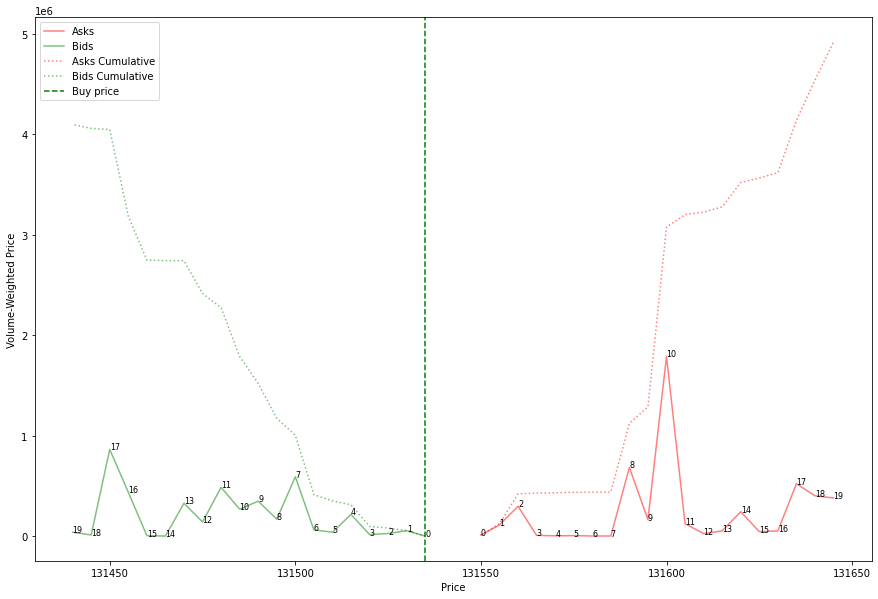

In [18]:
x = 7
plot_orderbook(ob[x], prices[x])

15
Sell
[13871.81364392679, 17557.861896838604, 36634.4758735441, 265555.94841930113, 86715.47420965058, 146554.77537437604, 833399.6672212979, 135508.52745424293, 1603615.241264559, 313102.928452579, 4189538.635607321, 10625.499168053244, 7806.788685524126, 5422.004991680532, 729612.9783693843, 1952.071547420965, 114742.82861896839, 31235.540765391015, 7809.1846921797005, 86772.0465890183]
[41806.34807417974, 4644.971469329529, 11890.670470756064, 167206.1340941512, 1671.997146932953, 31395.18544935806, 1044917.9743223966, 98264.9572039943, 36406.790299572036, 190199.6005706134, 6634627.960057061, 2971.6405135520686, 445914.6790299572, 116070.79172610557, 156178.85877318116, 74279.60057061342, 1218324.3509272467, 106954.40798858773, 67029.61483594864, 343304.70042796]
Cum
['13872', '31430', '68064', '333620', '420336', '566890', '1400290', '1535799', '3139414', '3452517', '7642055', '7652681', '7660488', '7665910', '8395523', '8397475', '8512218', '8543453', '8551262', '8638034']
['41

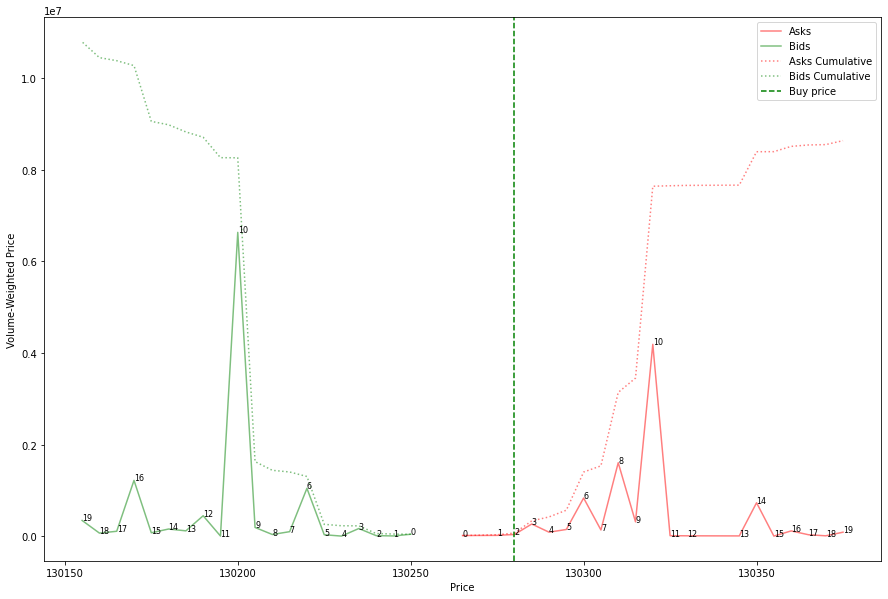

In [19]:
x = 8
plot_orderbook(ob[x], prices[x])

15
Sell
[46075.73275862069, 9101.724137931034, 568.8793103448276, 81921.72413793103, 275358.448275862, 81927.93103448275, 205396.5517241379, 205404.3318965517, 96162.45689655172, 14226.293103448277, 2276.293103448276, 145688.27586206896, 46098.426724137935, 14228.44827586207, 96187.9525862069, 164493.31896551722, 128070.58189655174, 227689.6551724138, 111572.1551724138, 14231.681034482759]
[7018.882978723404, 101348.82978723405, 135875.27659574468, 204647.36170212764, 646762.2127659575, 101333.46808510639, 252622.3404255319, 1707662.2978723403, 90937.14893617021, 189725.87234042553, 324430.1702127659, 405241.7021276596, 33955.946808510635, 1122.468085106383, 175378.98936170212, 4489.531914893617, 33950.79787234042, 235963.12765957447, 13747.62765957447, 81079.87234042553]
Cum
['46076', '55177', '55746', '137668', '413027', '494954', '700351', '905755', '1001918', '1016144', '1018420', '1164109', '1210207', '1224436', '1320623', '1485117', '1613187', '1840877', '1952449', '1966681']
['7

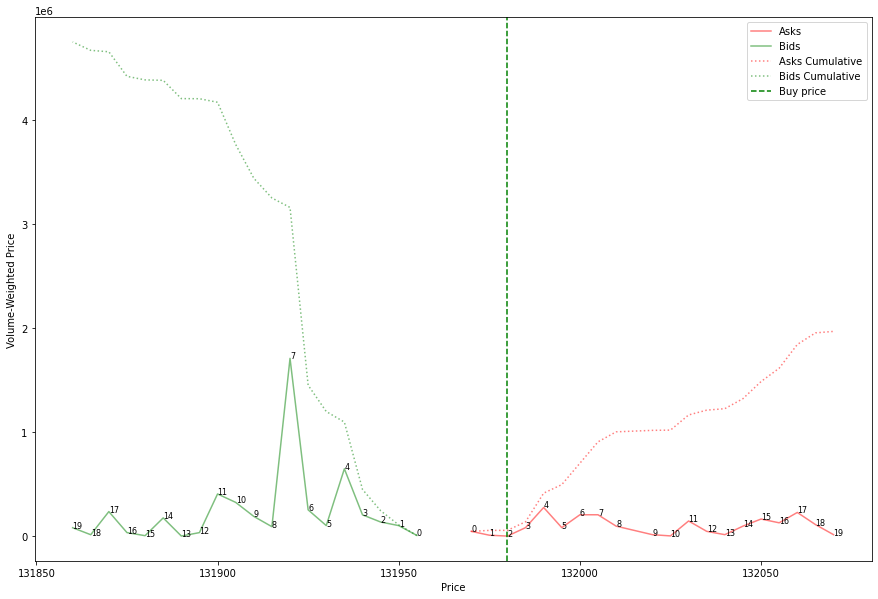

In [20]:
x = 9
plot_orderbook(ob[x], prices[x])

15
Sell
[313.2775119617225, 1253.157894736842, 61407.081339712924, 6053528.145933014, 313.32535885167465, 2820.035885167464, 25381.29186602871, 5013.77990430622, 52960.07177033493, 90568.31339712918, 90571.77033492822, 113140.68181818182, 2820.7894736842104, 31343.301435406698, 37926.84210526315, 101560.04784688995, 301243.6124401914, 1284017.6076555024, 70535.88516746412, 228544.98803827752]
[273.9225941422594, 9860.836820083681, 27390.167364016736, 246502.0920502092, 13420.15690376569, 214714.30962343095, 109543.9330543933, 27384.937238493723, 13418.106694560669, 46277.00836820084, 316533.5983263599, 298176.4016736402, 280368.20083682006, 230254.53974895398, 5213793.0125523005, 230236.94560669456, 70081.33891213388, 88693.30543933055, 22172.47907949791, 17518.326359832634]
Cum
['313', '1566', '62974', '6116502', '6116815', '6119635', '6145016', '6150030', '6202990', '6293558', '6384130', '6497271', '6500092', '6531435', '6569362', '6670922', '6972166', '8256183', '8326719', '8555264'

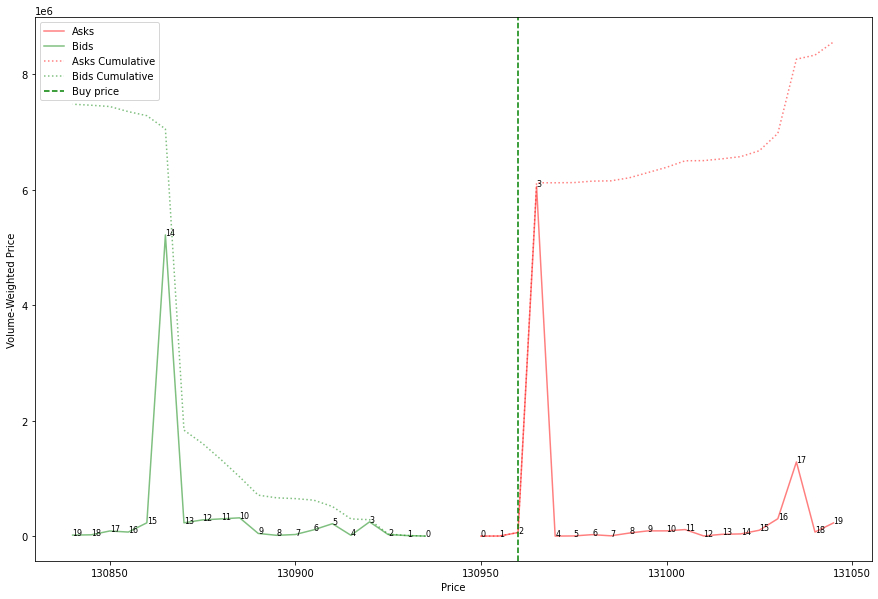

In [21]:
x = 10
plot_orderbook(ob[x], prices[x])

15
Sell
[1256.1630695443644, 90761.24700239809, 6786625.143884892, 61561.39088729017, 25442.158273381297, 7852.817745803357, 45233.95683453238, 5026.187050359712, 70683.45323741007, 70686.15107913669, 11310.21582733813, 113420.65947242206, 7854.916067146283, 53101.25899280576, 31422.062350119904, 1327632.793764988, 11312.805755395684, 166241.7386091127, 113450.95923261391, 38027.94964028777]
[333.1806615776082, 21322.748091603054, 120269.03307888041, 408099.55470737914, 56298.93129770992, 26982.480916030534, 96267.15012722646, 280130.0381679389, 47963.35877862595, 8326.653944020356, 506574.27480916027, 8326.017811704834, 21313.79134860051, 161179.3893129771, 85248.65139949111, 2520399.961832061, 161160.91603053434, 26970.114503816792, 161148.60050890586, 74911.25954198473]
Cum
['1256', '92017', '6878643', '6940204', '6965646', '6973499', '7018733', '7023759', '7094443', '7165129', '7176439', '7289860', '7297714', '7350816', '7382238', '8709871', '8721183', '8887425', '9000876', '903890

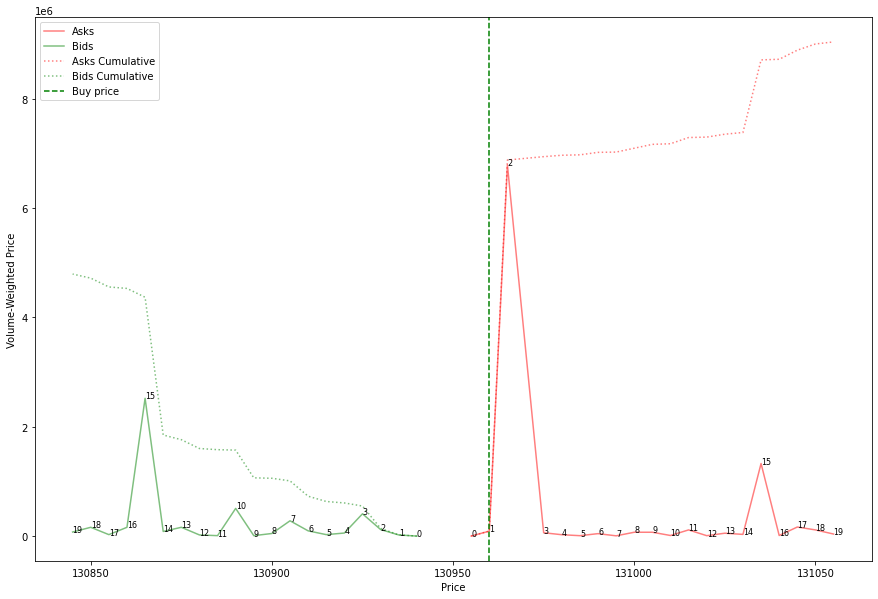

In [22]:
x = 11
plot_orderbook(ob[x], prices[x])

15
Buy
[3570.0, 14280.547945205479, 2008.279109589041, 339412.19178082194, 22315.924657534244, 187684.12671232875, 50214.68321917808, 258001.78082191778, 803496.5753424657, 514257.5342465753, 452001.49828767125, 108038.08219178082, 57146.30136986301, 650957.0547945205, 89297.94520547945, 89301.3698630137, 305645.6592465754, 2188274.6404109593, 32152.191780821915, 18086.301369863013]
[16577.38170347003, 49456.24079915878, 4931.735015772871, 35068.769716088325, 54792.84963196635, 13697.686645636173, 197787.00315457414, 342415.87802313355, 9116678.233438484, 26843.343848580444, 547.8023133543638, 8764.500525762354, 54776.025236593065, 92567.92849631967, 107352.76550998949, 6709.2902208201895, 16014597.728706624, 2190.62039957939, 370200.63091482647, 54761.30389064143]
Cum
['3570', '17851', '19859', '359271', '381587', '569271', '619486', '877488', '1680984', '2195242', '2647243', '2755281', '2812428', '3463385', '3552683', '3641984', '3947630', '6135904', '6168056', '6186143']
['16577', '

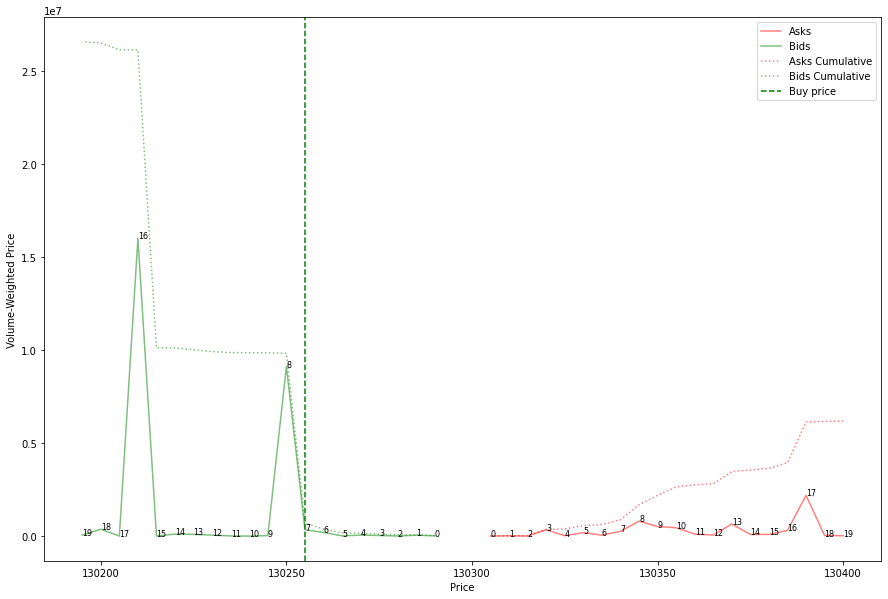

In [23]:
x = 12
plot_orderbook(ob[x], prices[x])

20
Sell
[50027.6653696498, 349441.2451361867, 57434.0953307393, 57436.284046692606, 2207934.892996109, 57440.66147859922, 255.30155642023345, 4084.9805447470817, 2297.8891050583657, 12511.206225680933, 25534.046692607004, 25535.019455252917, 57455.98249027238, 50052.45136186771, 888975.6128404669, 16344.90272373541, 135105.98249027238, 1251501.9455252916, 214806.78015564202, 1324138.832684825]
[3342.0382165605097, 25273.200636942674, 386184.84872611467, 654964.5859872611, 175639.10031847132, 2714053.1847133758, 30071.464968152864, 35290.859872611465, 351015.82006369426, 120272.10191082802, 564589.1719745223, 101054.26751592357, 461199.1003184713, 16910.6847133758, 285800.5493630573, 227337.4203821656, 441715.0, 141109.61783439488, 5218.351910828025, 3339.6178343949045]
Cum
['50028', '399469', '456903', '514339', '2722274', '2779715', '2779970', '2784055', '2786353', '2798864', '2824398', '2849933', '2907389', '2957442', '3846417', '3862762', '3997868', '5249370', '5464177', '6788316']


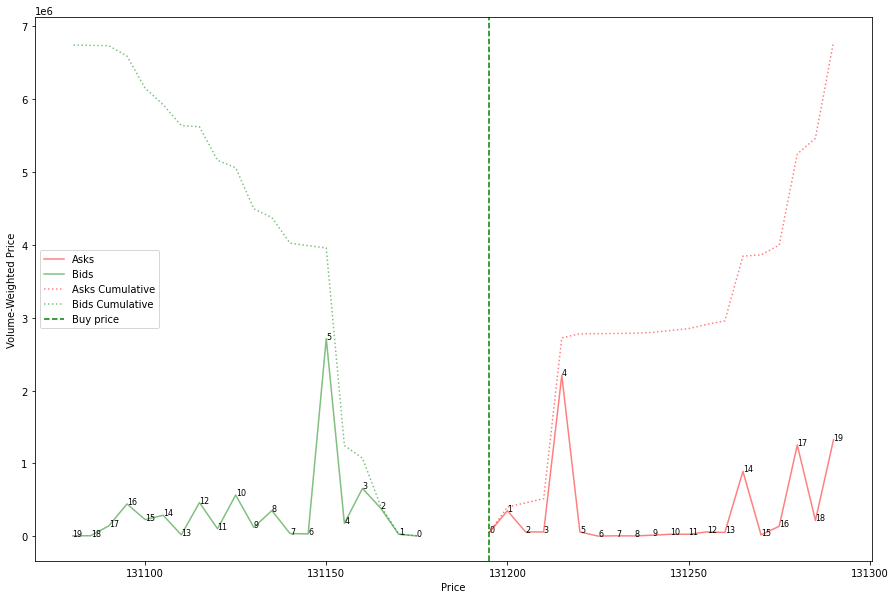

In [24]:
x = 13
plot_orderbook(ob[x], prices[x])

5
Buy
[11911.444568868981, 170001.90369540872, 2353.057110862262, 9412.586786114221, 7206.786114221724, 107223.4098544233, 1327473.4042553192, 14709.406494960806, 2353.5946248600226, 71198.94736842105, 259503.56103023514, 170066.6293393057, 180224.52407614782, 247321.59574468085, 397848.3314669653, 640936.8645016798, 14415595.296752518, 58860.02239641657, 160252.5083986562, 201463.75699888018]
[240827.7003816794, 81185.49618320611, 12277.585877862595, 30316.965648854963, 30315.81106870229, 81173.12977099237, 56368.0820610687, 651590.2099236641, 49099.12213740458, 42333.85496183206, 577121.2213740458, 651490.9351145038, 36067.32824427481, 6261.4503816793895, 132487.24236641222, 1227150.7633587786, 677161.0687022901, 342824.7709923664, 90398.12022900763, 81129.84732824427]
Cum
['11911', '181913', '184266', '193679', '200886', '308109', '1635583', '1650292', '1652646', '1723845', '1983348', '2153415', '2333639', '2580961', '2978809', '3619746', '18035341', '18094201', '18254454', '1845591

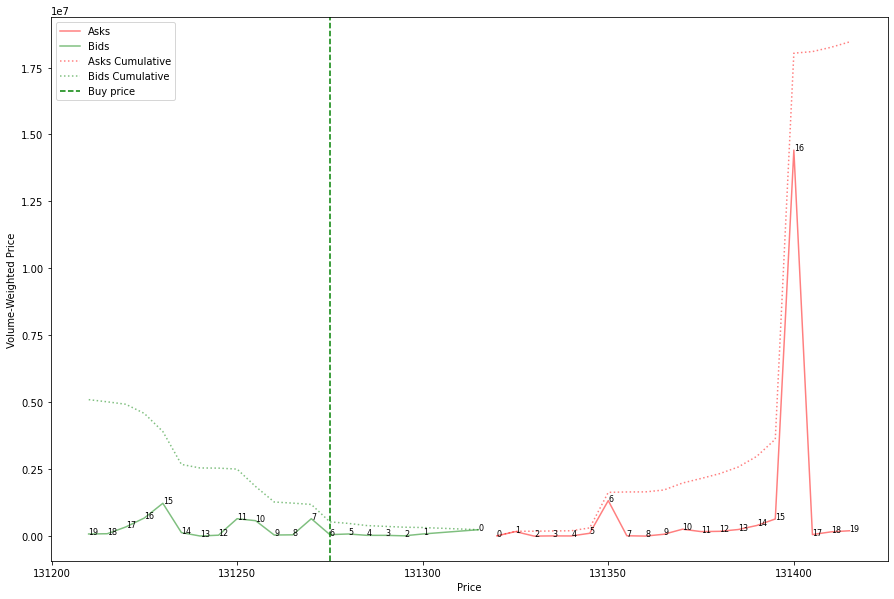

In [25]:
x = 14
plot_orderbook(ob[x], prices[x])

5
Buy
[36731.197771587744, 44446.43454038997, 44448.119777158776, 29755.654596100278, 132619.73537604455, 82660.86350974931, 587832.86908078, 72014.9860724234, 36743.732590529245, 119054.20612813371, 36746.51810584958, 13229.24791086351, 1469.9721448467967, 18007.84122562674, 309085.069637883, 119085.79387186629, 450264.2757660167, 119094.81894150417, 229744.0807799443, 994002.4512534819]
[26452.97850562948, 53983.62333674514, 605808.2395087001, 59512.430910951894, 105795.86489252814, 121444.72876151484, 2386838.1473899693, 146936.9754350051, 238004.58546571137, 1021195.2251791197, 298022.81473899697, 1322232.144319345, 7450005.117707267, 84311.0286591607, 6609.733879222108, 53954.964176049136, 129621.8833162743, 22794.242579324462, 8631.81166837257, 38976.54554759468]
Cum
['36731', '81178', '125626', '155381', '288001', '370662', '958495', '1030510', '1067254', '1186308', '1223054', '1236284', '1237754', '1255761', '1564846', '1683932', '2134197', '2253291', '2483035', '3477038']
['26

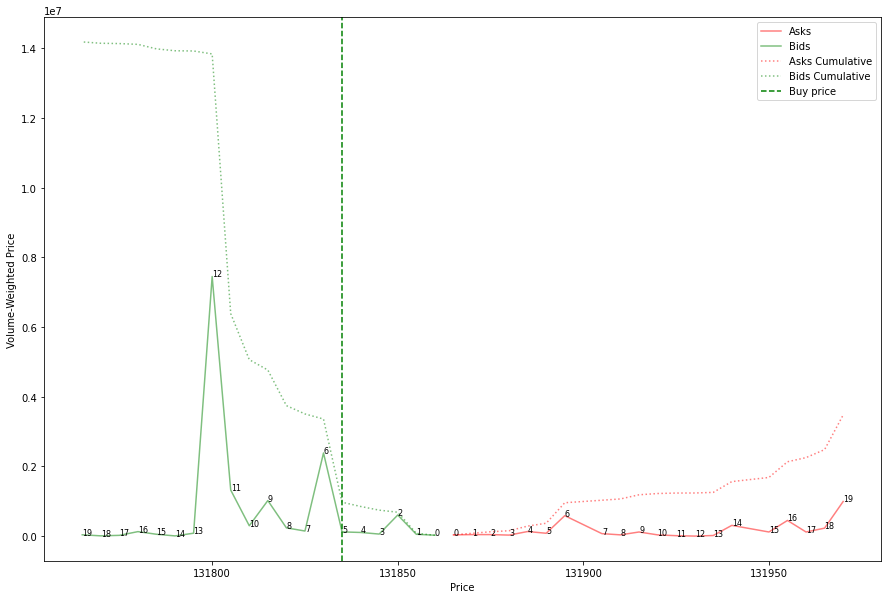

In [26]:
x = 15
plot_orderbook(ob[x], prices[x])

35
Sell
[11990.384615384615, 38850.32967032967, 1918.6080586080586, 107925.82417582418, 107929.94505494506, 1918.8278388278388, 11993.131868131868, 23507.4358974359, 30704.761904761905, 47978.02197802198, 94040.51282051281, 191926.73992673995, 191934.06593406593, 1399252.7472527472, 7677.948717948718, 107975.27472527472, 69106.81318681319, 69109.45054945056, 38875.54945054945, 587955.1282051281]
[1709714.2857142857, 21637.744897959186, 180574.77551020408, 32320.58163265306, 273512.4897959184, 86537.75510204083, 153839.02040816325, 106828.57142857142, 471096.0, 129252.693877551, 1234796.7346938776, 45128.17346938775, 60079.59183673469, 96390.6836734694, 240300.0, 32305.76530612245, 2402.816326530612, 77154.15306122448, 6673.9795918367345, 166843.11224489796]
Cum
['11990', '50841', '52759', '160685', '268615', '270534', '282527', '306034', '336739', '384717', '478758', '670685', '862619', '2261871', '2269549', '2377525', '2446631', '2515741', '2554616', '3142572']
['1709714', '1731352', 

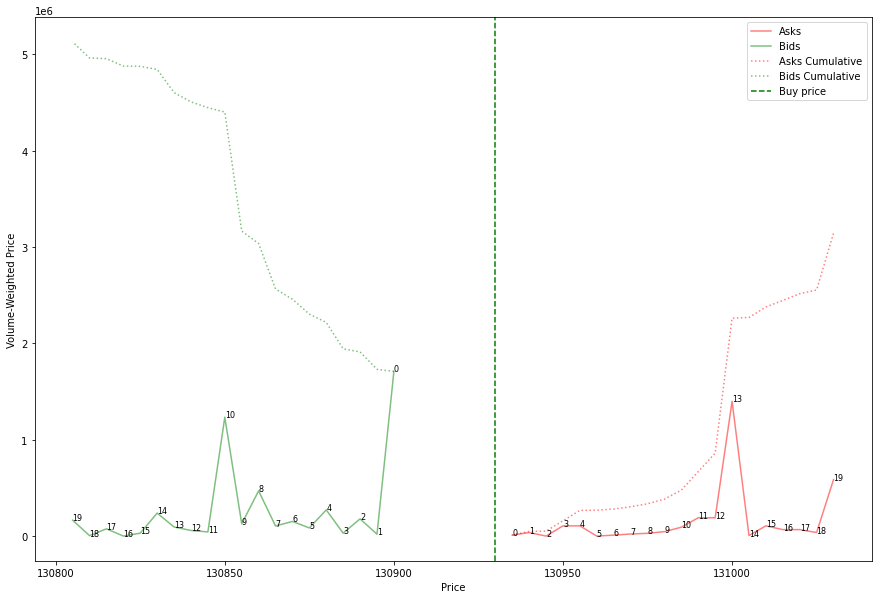

In [27]:
x = 16
plot_orderbook(ob[x], prices[x])

10
Buy
[57855.9554973822, 249577.53926701573, 395778.6910994764, 136952.87958115182, 181127.10732984293, 77041.88481675393, 77044.82984293194, 443795.1832460733, 41436.16492146597, 21917.486910994765, 21918.324607329843, 308238.21989528794, 41442.5, 49321.884816753925, 49323.76963350785, 494626.7015706806, 3082.9712041884814, 67142.82722513088, 663232.0418848167, 21925.863874345552]
[449.36426116838487, 449.3298969072165, 145577.31958762888, 11232.388316151204, 7188.453608247422, 22013.79725085911, 449.2268041237113, 1796.8384879725086, 4042.7319587628867, 22009.587628865982, 54348.12714776632, 44914.08934707904, 88028.24742268042, 28742.81786941581, 64668.865979381444, 718515.4639175258, 550092.35395189, 1616536.0824742268, 258635.87628865978, 352018.6941580756]
Cum
['57856', '307433', '703212', '840165', '1021292', '1098334', '1175379', '1619174', '1660610', '1682528', '1704446', '2012684', '2054127', '2103449', '2152772', '2647399', '2650482', '2717625', '3380857', '3402783']
['449'

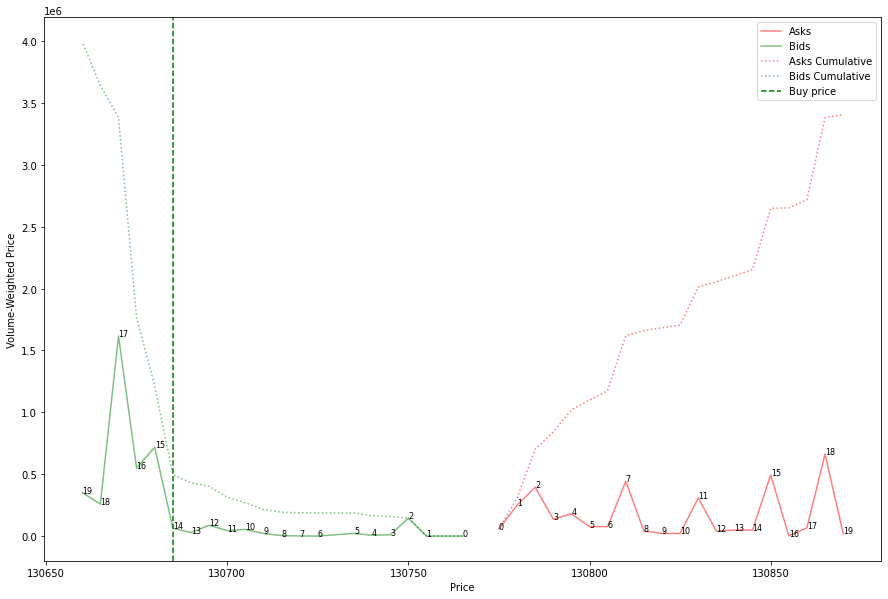

In [28]:
x = 17
plot_orderbook(ob[x], prices[x])

20
Sell
[24012.773722627735, 11766.706204379561, 923121.1678832116, 138329.34306569345, 11768.047445255474, 29060.97627737226, 61486.71532846715, 8646.897810218978, 2161.806569343066, 96083.94160583941, 600547.4452554744, 600570.2554744525, 346902.5547445255, 311359.2700729927, 202054.85401459853, 40604.71715328467, 15377.518248175182, 261668.02007299272, 836456.3503649634, 1046751.5693430657]
[48729.62962962963, 48727.777777777774, 124738.37037037038, 12181.018518518518, 214865.0, 563207.4814814815, 7794.9629629629635, 39460.5, 487.14814814814815, 12178.24074074074, 194844.44444444444, 7793.481481481482, 487.0740740740741, 1948.2222222222224, 124681.48148148149, 4383.166666666667, 280512.0, 438283.3333333333, 381778.962962963, 354982.5]
Cum
['24013', '35779', '958901', '1097230', '1108998', '1138059', '1199546', '1208193', '1210354', '1306438', '1906986', '2507556', '2854459', '3165818', '3367873', '3408477', '3423855', '3685523', '4521979', '5568731']
['48730', '97457', '222196', '23

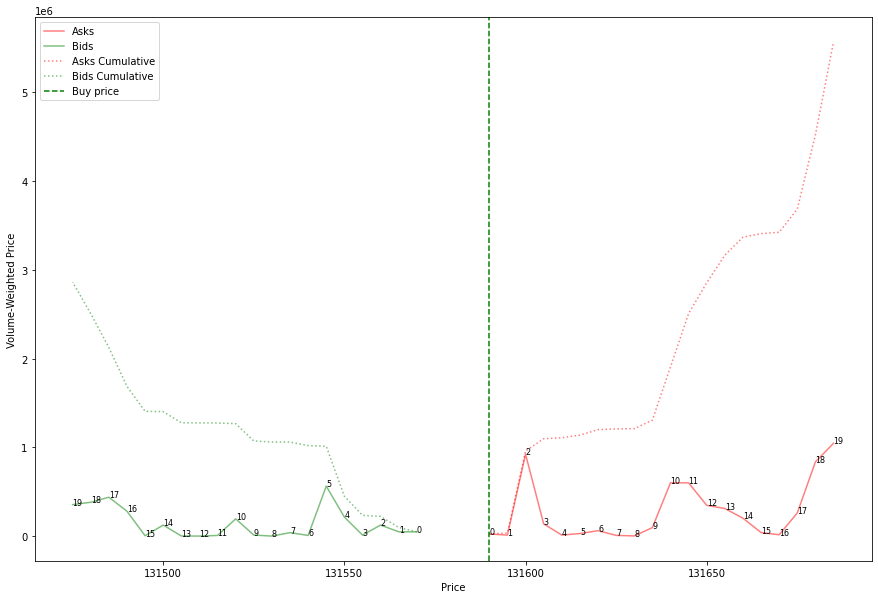

In [29]:
x = 18
plot_orderbook(ob[x], prices[x])

15
Buy
[52133.34112149533, 52135.31542056075, 89157.85046728971, 19745.04672897196, 149327.57009345794, 44429.719626168226, 37336.13317757009, 7714.369158878504, 11109.11214953271, 15121.308411214952, 24997.39485981308, 44441.495327102806, 123453.27102803737, 2669469.3925233646, 89201.7406542056, 7716.705607476635, 1234.7196261682243, 37351.68224299065, 37353.095794392524, 5543285.700934579]
[3237.4250681198905, 3237.302452316076, 29134.618528610357, 143869.2098092643, 51790.95367847411, 12947.24795640327, 35963.215258855584, 634367.0844686648, 51783.106267029965, 158579.75476839236, 174035.58583106266, 43507.24795640327, 207101.0354223433, 23010.35422343324, 51771.33514986376, 368137.76566757495, 1565964.196185286, 60752.50681198911, 60750.20435967303, 281812.75204359676]
Cum
['52133', '104269', '193427', '213172', '362499', '406929', '444265', '451979', '463088', '478210', '503207', '547649', '671102', '3340571', '3429773', '3437490', '3438724', '3476076', '3513429', '9056715']
['323

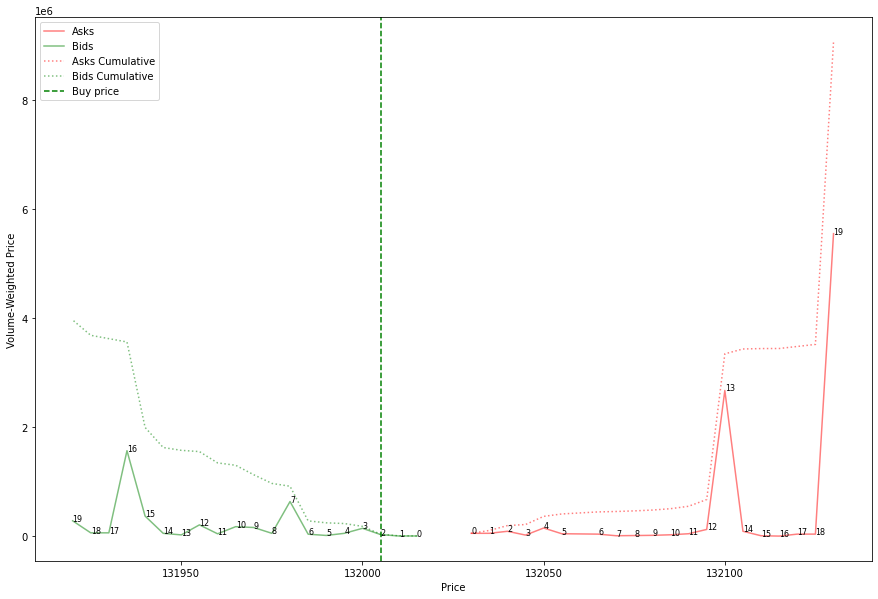

In [30]:
x = 21
plot_orderbook(ob[x], prices[x])

15
Buy
[51643.814713896456, 35865.12261580381, 35866.48501362398, 35867.84741144414, 51651.6621253406, 116220.65395095368, 43405.0408719346, 12914.877384196185, 80721.04904632152, 439497.9564032698, 603121.7302452317, 3229.209809264305, 80733.310626703, 242567.95640326978, 173679.50953678472, 759338.4196185286, 8971.730245231607, 70341.03542234332, 17585.926430517713, 861743.10626703]
[70302.85582255083, 470938.26247689466, 41108.23475046211, 29431.40480591497, 243.22550831792975, 97286.50646950094, 128656.51571164509, 41100.42513863216, 3272344.9907578556, 607948.2439926063, 140065.95194085027, 29422.458410351202, 24315.157116451017, 709003.0314232903, 54704.94454713494, 62239.70425138632, 15559.334565619223, 470651.977818854, 428821.5526802218, 19690.036968576707]
Cum
['51644', '87509', '123375', '159243', '210895', '327116', '370521', '383436', '464157', '903655', '1506776', '1510005', '1590739', '1833307', '2006986', '2766325', '2775296', '2845637', '2863223', '3724966']
['70303', 

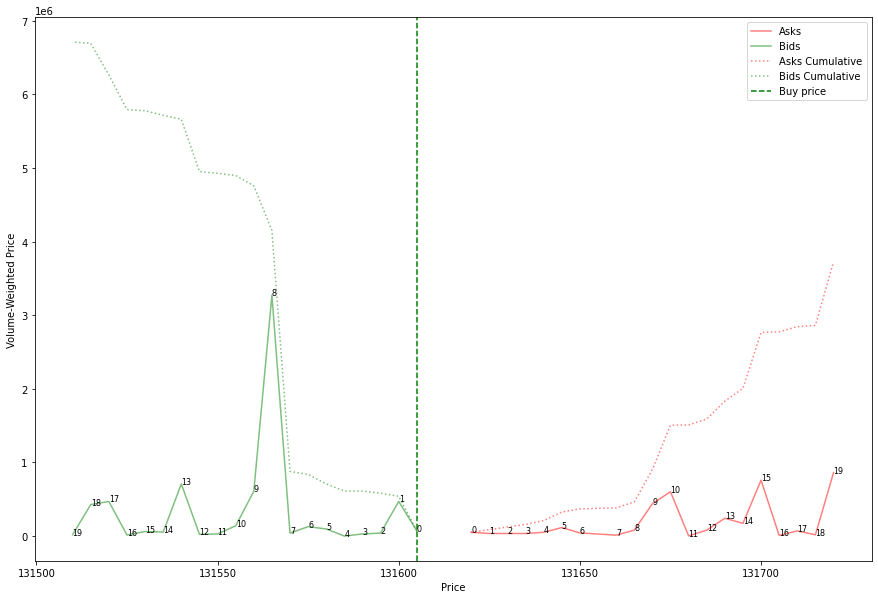

In [31]:
x = 22
plot_orderbook(ob[x], prices[x])

5
Sell
[25999.55801104972, 2889.0607734806626, 72229.28176795579, 6500.883977900552, 46230.27624309392, 46232.044198895026, 318579.861878453, 141601.87845303866, 35401.82320441989, 2890.0552486187844, 104045.96685082873, 722.5690607734806, 26013.480662983424, 208838.42541436464, 318689.50276243093, 185005.96685082873, 87447.56906077347, 87450.91160220995, 11564.198895027625, 722.7900552486187]
[23341.964285714286, 1456716.267857143, 33609.857142857145, 7987870.535714285, 23338.392857142855, 59744.0, 3733.8571428571427, 933.4285714285714, 33602.142857142855, 39434.33928571429, 515426.75892857136, 134393.14285714287, 84225.8125, 75590.35714285713, 28228.651785714286, 67419.57142857143, 23327.67857142857, 14929.142857142857, 302303.5714285714, 170039.25]
Cum
['26000', '28889', '101118', '107619', '153849', '200081', '518661', '660263', '695665', '698555', '802601', '803323', '829337', '1038175', '1356865', '1541871', '1629318', '1716769', '1728333', '1729056']
['23342', '1480058', '151366

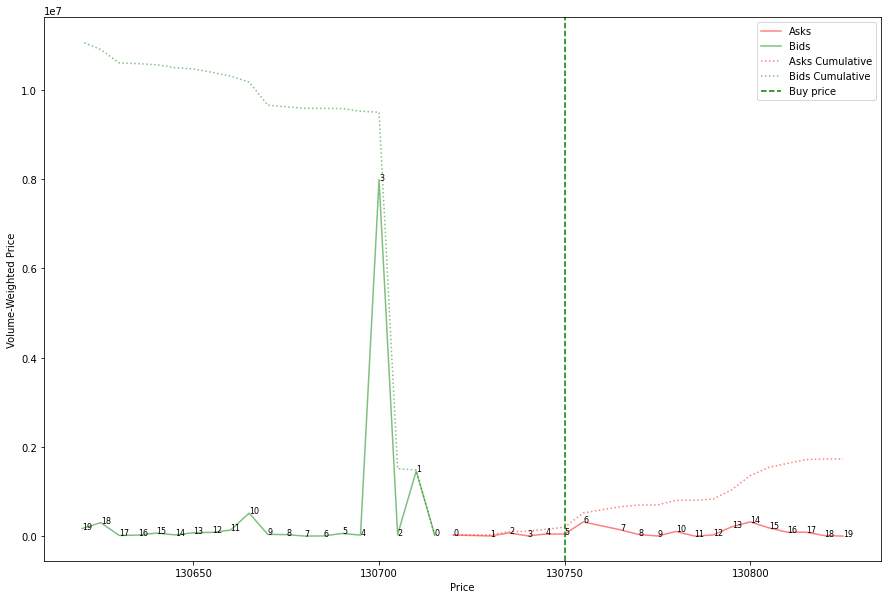

In [32]:
x = 23
plot_orderbook(ob[x], prices[x])

5
Buy
[29860.4118993135, 7465.389016018306, 7465.675057208237, 1194.553775743707, 119459.9542334096, 776818.1121281465, 201902.79176201375, 2688.157894736842, 1194.7826086956522, 7467.677345537757, 86329.65675057209, 43017.11670480549, 1381380.3203661328, 76480.73226544622, 172088.23798627002, 172094.82837528604, 1148537.9405034324, 43027.00228832952, 970833.9130434783, 76498.30663615561]
[29388.513513513513, 2644.864864864865, 49662.78153153153, 84923.04054054053, 10578.243243243243, 4701.261261261261, 169238.91891891893, 359912.7252252252, 66103.88513513513, 117513.5135135135, 470036.03603603604, 57577.207207207204, 117500.0, 117495.49549549549, 380670.8108108108, 106031.55405405405, 763926.5878378379, 2222967.5675675673, 293.68243243243245, 23787.364864864867]
Cum
['29860', '37326', '44791', '45986', '165446', '942264', '1144167', '1146855', '1148050', '1155518', '1241847', '1284864', '2666245', '2742725', '2914814', '3086908', '4235446', '4278473', '5249307', '5325806']
['29389', '

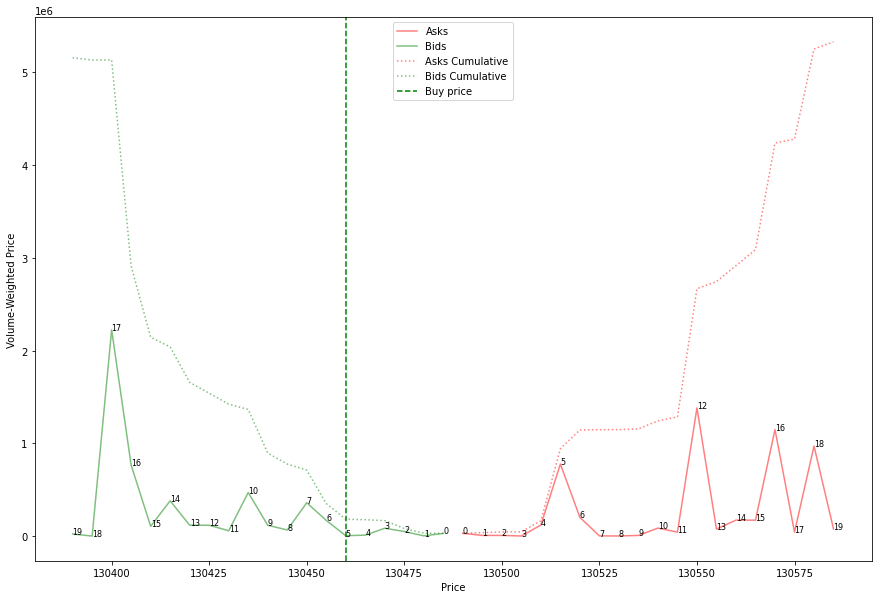

In [33]:
x = 24
plot_orderbook(ob[x], prices[x])